# Import

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import seaborn as sns
import pickle

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE

# Data

In [2]:
corpus = pickle.load(open("corpus.p", "rb"))
nho_df = pickle.load(open("nho_df.p", "rb"))

# t-SNE Visualizations

In [3]:
svd = TruncatedSVD(n_components= 50, algorithm = 'randomized')
svd_topic = svd.fit_transform(corpus)

nmf = NMF(n_components=50, init='nndsvd', solver = 'cd')
nmf_topic = nmf.fit_transform(corpus)

lda = LatentDirichletAllocation(n_topics=50, learning_method='batch')
lda_topic = lda.fit_transform(corpus)

In [4]:
# KMean clusters
clusters_are_about = ['Film Industry', 
                      'Work & Play', 
                      'Beaches', 
                      'Parks & Lakes', 
                      'Staycation', 
                      'Business Trip', 
                      'Dining & Coffee', 
                      'Must Commute', 
                      'Shopping']

In [5]:
DimR = [svd_topic, nmf_topic, lda_topic]
DimLabels = ['Truncated Singular Value Decomposition', 'Non-Negative Matrix Factorization', 'Latent Dirichlet Allocation']
model = TSNE(n_components = 2, perplexity = 50, learning_rate = 1000)

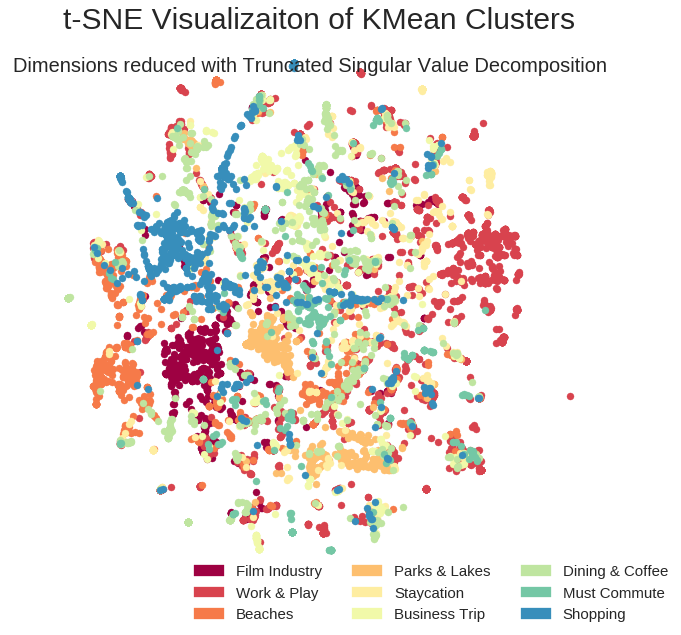

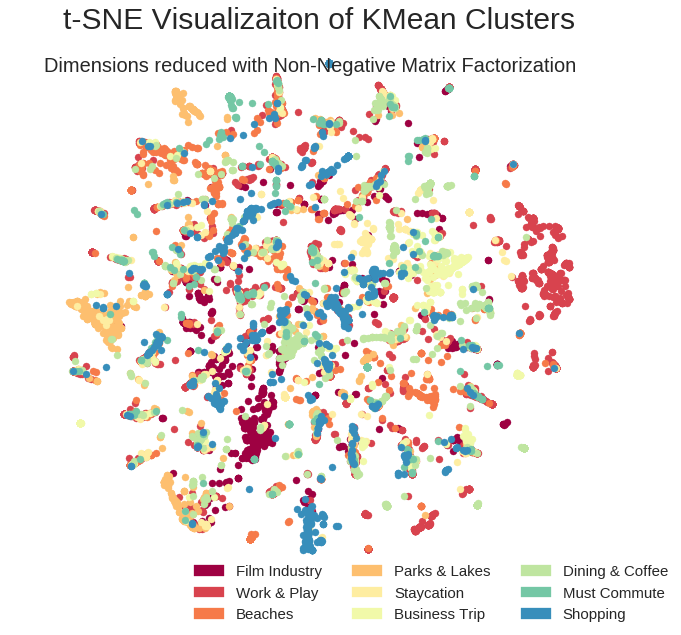

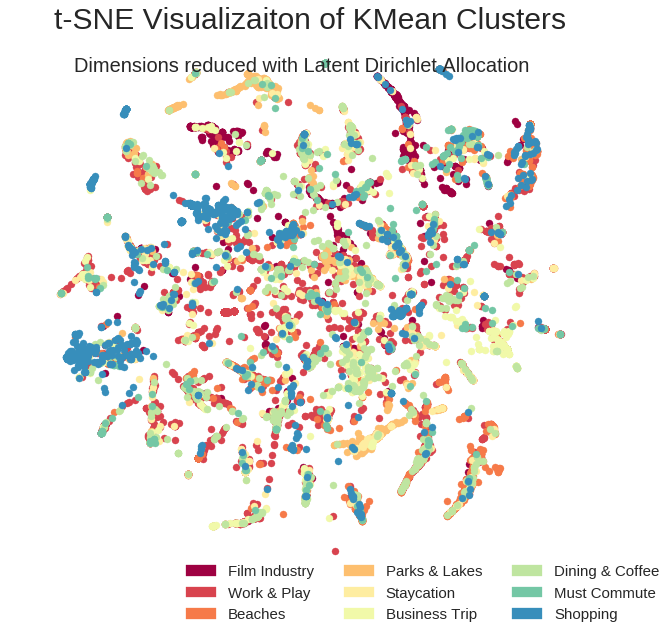

In [6]:
for i in range(0,3):  
    tsne_matrix = model.fit_transform(DimR[i])
    tsne_df = pd.DataFrame(tsne_matrix, columns=['X','Y'])
    tsne_df['clusters'] = nho_df['km_id']
    data = tsne_df
    
    plt.figure(figsize=(10,10))
    colors = plt.cm.Spectral(np.linspace(0, 1, 10))
    patches = []

    for n in range(0,9):
        data_temp = data[data['clusters'] == n]
        color = colors[n]
        plt.scatter(data=data_temp, x='X', y='Y', s=50, c=color)
        patches.append(mpatches.Patch(color=color, label= clusters_are_about[n]))

    plt.axis('off')
    plt.legend(handles=patches, ncol=3, bbox_to_anchor=(1.15, 0.05), fontsize=15)
    plt.title('t-SNE Visualizaiton of KMean Clusters', fontsize=30)
    plt.suptitle('Dimensions reduced with %s' % DimLabels[i], fontsize=20, y=0.85)
    plt.show()